In [98]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl

In [136]:
df = pd.read_csv('fcc-forum-pageviews.csv', index_col='date', parse_dates=True)

In [137]:
df.shape

(1304, 1)

In [138]:
df = df.sort_values(by='value')

In [139]:
df.shape

(1304, 1)

In [140]:
shape = df.shape[0]
df = df.iloc[round(shape * 0.025) : round(shape * 0.975)]

In [141]:
df.head(-5)

,value
date,
2016-05-26,18060
2016-06-08,18072
2016-06-09,18139
2016-06-07,18335
2016-06-15,18584
...,...
2018-10-13,168644
2019-11-21,169121
2019-10-17,169663


In [142]:
df = df.sort_index()

In [143]:
df.head(-5)

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-16,125634
2019-11-17,131639
2019-11-20,151733


[Text(0.5, 0, &#39;Date&#39;),
 Text(0, 0.5, &#39;Page Views&#39;),
 Text(0.5, 1.0, &#39;Daily freeCodeCamp Forum Page Views 5/2016-12/2019&#39;)]

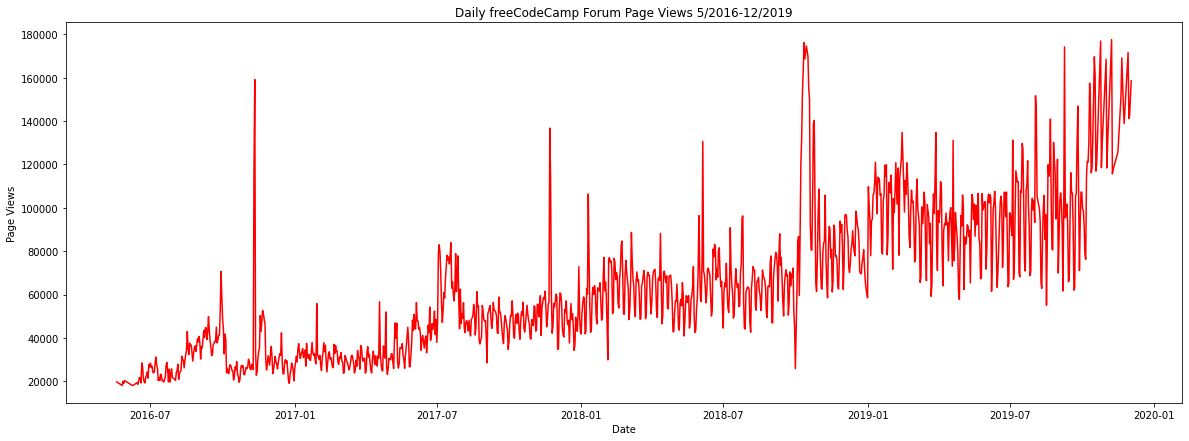

In [144]:
fig, ax = plt.subplots(figsize=(20,7))
ax.plot(df.index, df['value'], color='red')
ax.set(xlabel='Date', ylabel='Page Views', title='Daily freeCodeCamp Forum Page Views 5/2016-12/2019')


In [70]:
len(ax.lines[0].get_ydata())

1238

In [50]:
df_sorted.index.name

&#39;date&#39;

In [77]:
df_bar = df.copy()

In [78]:
df_bar.head()

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325


In [79]:
df_bar.index = pd.to_datetime(df_bar.index)

In [80]:
df_bar.index[0].year

2016

In [81]:
df_bar['Months'] = df_bar.index.month_name()

In [82]:
df_bar.index = df_bar.index.year

In [83]:
df_bar.head()

,value,Months
date,,
2016,19736,May
2016,18060,May
2016,19997,May
2016,19044,May
2016,20325,May


In [84]:
df_bar = df_bar.reset_index()

In [85]:
df_bar = df_bar.rename(columns={'date' : 'year'})

In [88]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df_bar['Months'] = pd.Categorical(df_bar['Months'], categories=months)

In [93]:
df_bar = df_bar.groupby(['year', 'Months'])['value'].mean().unstack()

In [94]:
df_bar.head()

Months,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,19432.400000,21875.105263,24109.678571,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,111378.142857,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,90435.642857,97236.566667,102717.310345,97268.833333,122802.272727,143166.428571,150733.500000


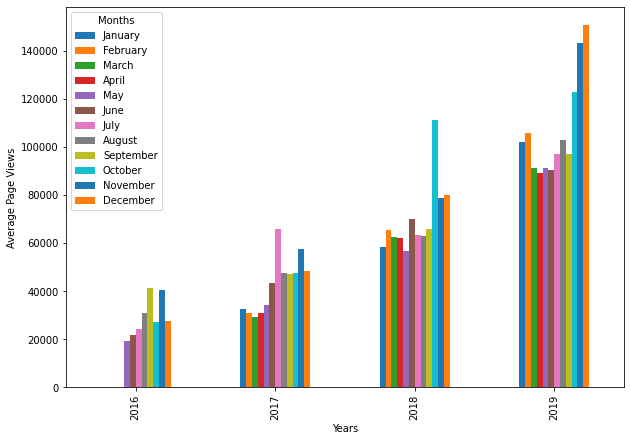

In [113]:
ax = df_bar.plot(kind='bar', figsize=(10,7), xlabel='Years', ylabel='Average Page Views')
fig = ax.figure

In [99]:
len([rect for rect in ax.get_children() if isinstance(rect, mpl.patches.Rectangle)])

49

In [117]:
fig.savefig('bar_plot.png')

In [158]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

In [160]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df_box['month'] = pd.Categorical(df_box['month'], categories=months)

In [161]:
df_box.head()

,date,value,year,month
0,2016-05-19,19736,2016,May
1,2016-05-26,18060,2016,May
2,2016-05-27,19997,2016,May
3,2016-05-28,19044,2016,May
4,2016-05-29,20325,2016,May


&lt;seaborn.axisgrid.FacetGrid at 0x23b431a8&gt;

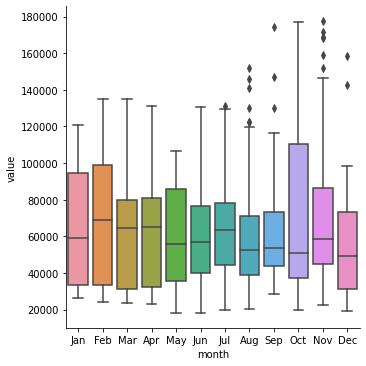

In [162]:
sns.catplot(x='month', y='value', kind='box', data=df_box)

Text(0.5, 1.0, &#39;Month-wise Box Plot(Trend)&#39;)

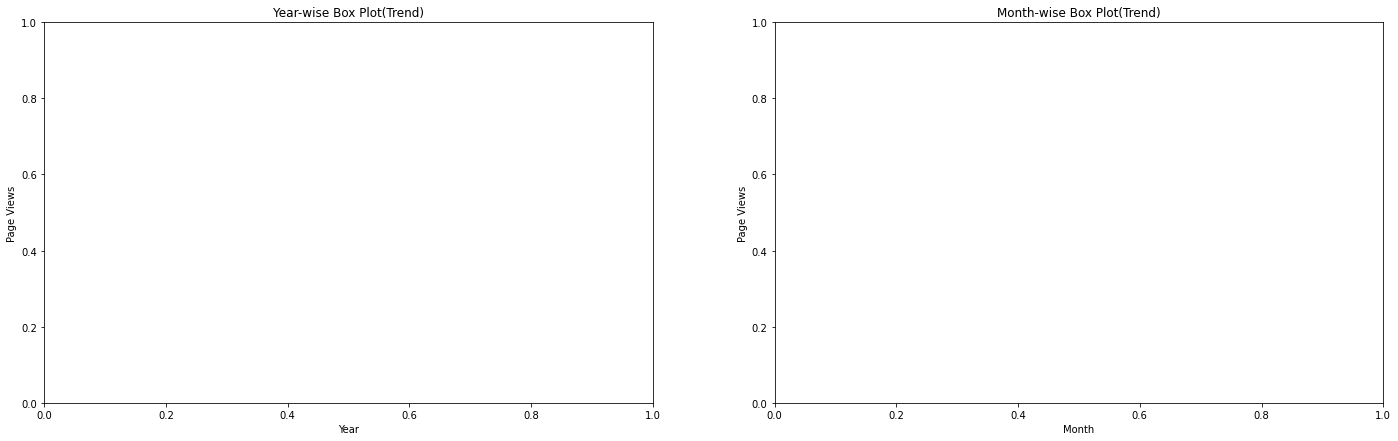

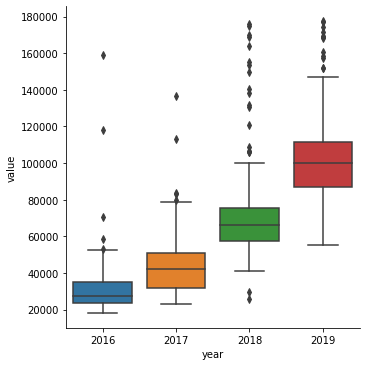

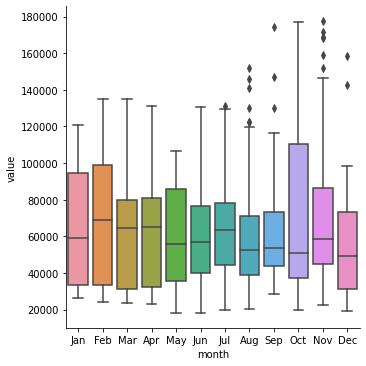

In [193]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(24,7))
g1 = sns.catplot(x='year', y='value', kind='box', data=df_box, ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('Page Views')
ax1.set_title('Year-wise Box Plot(Trend)')
g2 = sns.catplot(x='month', y='value', kind='box', data=df_box, ax=ax2)
ax2.set_xlabel('Month')
ax2.set_ylabel('Page Views')
ax2.set_title('Month-wise Box Plot(Trend)')

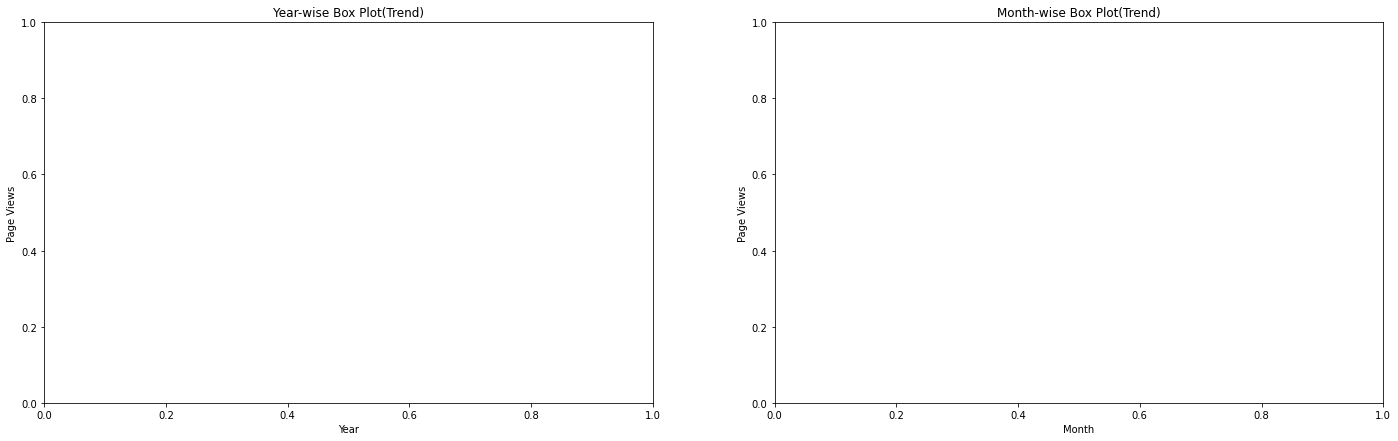

In [194]:
fig

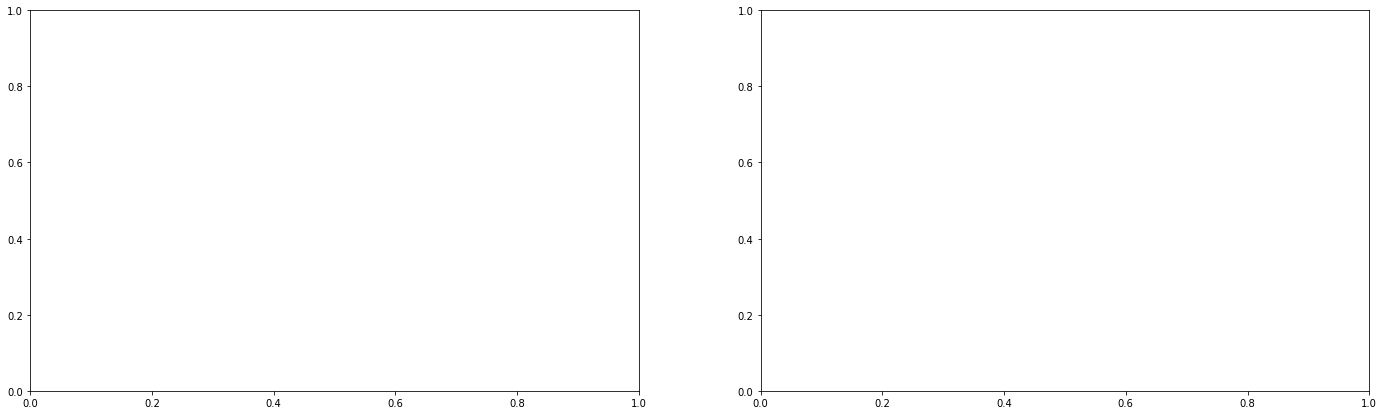

In [198]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(24,7))


&lt;Figure size 864x504 with 0 Axes&gt;

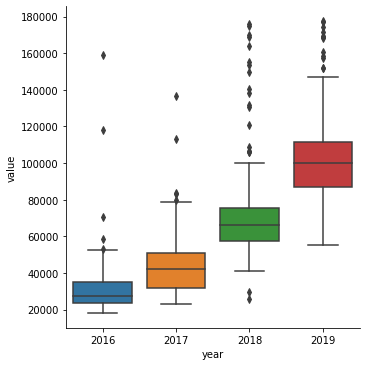

In [209]:
g1 = sns.catplot(x='year', y='value', kind='box', data=df_box, ax=axes[0])

&lt;Figure size 864x504 with 0 Axes&gt;

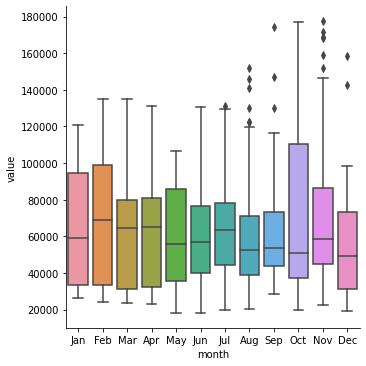

In [210]:
g2 = sns.catplot(x='month', y='value', kind='box', data=df_box, ax=axes[1])

In [211]:
fig.savefig('jadjad.png')